<a href="https://colab.research.google.com/github/diegomrodrigues/time_series_analysis/blob/main/Difference%20Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-66aedb0ae800>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


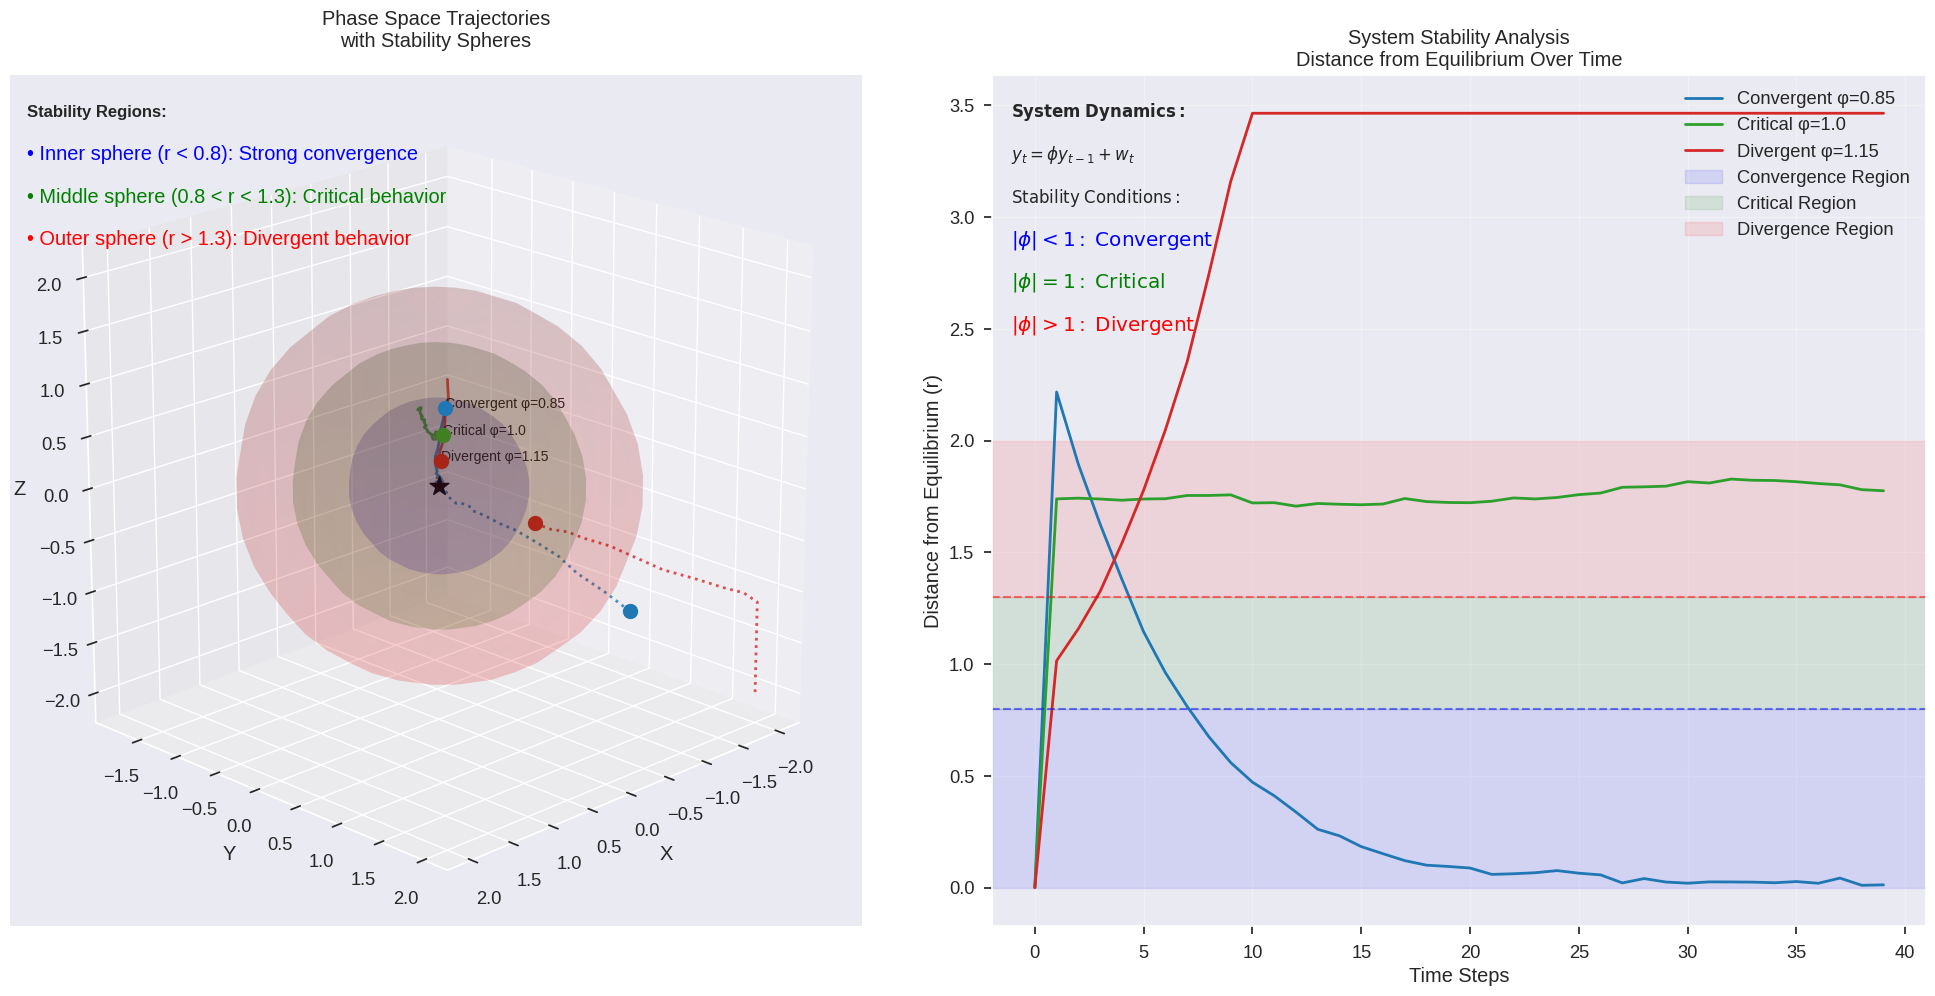

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

def create_sphere(center, radius, resolution=20):
    """Create a spherical shell"""
    phi = np.linspace(0, 2*np.pi, resolution)
    theta = np.linspace(0, np.pi, resolution)
    phi, theta = np.meshgrid(phi, theta)

    x = center[0] + radius * np.sin(theta) * np.cos(phi)
    y = center[1] + radius * np.sin(theta) * np.sin(phi)
    z = center[2] + radius * np.cos(theta)

    return x, y, z

# Set the style for better visualization
plt.style.use('seaborn')
sns.set_context("notebook", font_scale=1.2)

# Create figure with two subplots
fig = plt.figure(figsize=(20, 10))

# First subplot: 3D trajectories
ax1 = fig.add_subplot(121, projection='3d')

# Create and plot stability spheres
# Inner sphere (Convergent region)
x, y, z = create_sphere([0, 0, 0], 0.8)
ax1.plot_surface(x, y, z, color='blue', alpha=0.1)

# Middle sphere (Critical region)
x, y, z = create_sphere([0, 0, 0], 1.3)
ax1.plot_surface(x, y, z, color='green', alpha=0.1)

# Outer sphere (Divergent region)
x, y, z = create_sphere([0, 0, 0], 1.8)
ax1.plot_surface(x, y, z, color='red', alpha=0.1)

def generate_trajectory(x0, y0, z0, phi, n_steps=40):
    """Generate a trajectory with stability monitoring"""
    x_eq, y_eq, z_eq = 0, 0, 0
    noise_scale = 0.015

    x = np.zeros(n_steps)
    y = np.zeros(n_steps)
    z = np.zeros(n_steps)
    stability = np.zeros(n_steps)

    x[0], y[0], z[0] = x0, y0, z0

    for t in range(1, n_steps):
        noise = np.random.normal(0, noise_scale, 3)

        # Calculate next points
        x_next = phi * (x[t-1] - x_eq) + x_eq + noise[0]
        y_next = phi * (y[t-1] - y_eq) + y_eq + noise[1]
        z_next = phi * (z[t-1] - z_eq) + z_eq + noise[2]

        # Bound values
        max_val = 2
        x[t] = np.clip(x_next, -max_val, max_val)
        y[t] = np.clip(y_next, -max_val, max_val)
        z[t] = np.clip(z_next, -max_val, max_val)

        # Calculate stability metric
        stability[t] = np.sqrt(x[t]**2 + y[t]**2 + z[t]**2)

    return x, y, z, stability

# Generate and plot trajectories
np.random.seed(42)

trajectories = [
    # Convergent trajectories (|φ| < 1)
    {'x0': 1.5, 'y0': 1.5, 'z0': 1.5, 'phi': 0.85, 'color': '#1f77b4',
     'label': 'Convergent φ=0.85', 'style': '-'},
    {'x0': -1.2, 'y0': 1.2, 'z0': -1.2, 'phi': 0.85, 'color': '#1f77b4',
     'label': None, 'style': ':'},

    # Critical trajectories (|φ| = 1)
    {'x0': 1.0, 'y0': 1.0, 'z0': 1.0, 'phi': 1.0, 'color': '#2ca02c',
     'label': 'Critical φ=1.0', 'style': '-'},

    # Divergent trajectories (|φ| > 1)
    {'x0': 0.5, 'y0': 0.5, 'z0': 0.5, 'phi': 1.15, 'color': '#d62728',
     'label': 'Divergent φ=1.15', 'style': '-'},
    {'x0': -0.5, 'y0': 0.7, 'z0': -0.3, 'phi': 1.15, 'color': '#d62728',
     'label': None, 'style': ':'}
]

# Store stability data for second plot
stability_data = {}

for traj in trajectories:
    x, y, z, stability = generate_trajectory(traj['x0'], traj['y0'], traj['z0'], traj['phi'])

    # Plot trajectory
    ax1.plot(x, y, z, color=traj['color'], linestyle=traj['style'],
             linewidth=2, alpha=0.8)

    # Plot starting point
    ax1.scatter(x[0], y[0], z[0], color=traj['color'], s=100, marker='o')

    # Add label
    if traj['label']:
        ax1.text(x[0], y[0], z[0], f"\n{traj['label']}", fontsize=10)
        stability_data[traj['label']] = stability

# Plot equilibrium point
ax1.scatter(0, 0, 0, color='black', s=200, marker='*',
            label='Equilibrium Point')

# Customize first subplot
ax1.set_xlabel('X', labelpad=10)
ax1.set_ylabel('Y', labelpad=10)
ax1.set_zlabel('Z', labelpad=10)
ax1.set_title('Phase Space Trajectories\nwith Stability Spheres', pad=20)

# Set equal aspect ratio for spherical appearance
ax1.set_box_aspect([1,1,1])

# Add stability regions annotation with colored text
ax1.text2D(0.02, 0.95, "Stability Regions:", transform=ax1.transAxes, fontsize=12, fontweight='bold')
ax1.text2D(0.02, 0.90, "• Inner sphere (r < 0.8): Strong convergence", transform=ax1.transAxes, color='blue')
ax1.text2D(0.02, 0.85, "• Middle sphere (0.8 < r < 1.3): Critical behavior", transform=ax1.transAxes, color='green')
ax1.text2D(0.02, 0.80, "• Outer sphere (r > 1.3): Divergent behavior", transform=ax1.transAxes, color='red')

# Set view angle for better sphere visibility
ax1.view_init(elev=20, azim=45)
ax1.grid(True, alpha=0.3)

# Second subplot: Stability analysis
ax2 = fig.add_subplot(122)

time = np.arange(40)
for label, stability in stability_data.items():
    if 'Convergent' in label:
        color = '#1f77b4'
    elif 'Critical' in label:
        color = '#2ca02c'
    else:
        color = '#d62728'
    ax2.plot(time, stability, label=label, color=color, linewidth=2)

# Add regions with labels
ax2.axhspan(0, 0.8, color='blue', alpha=0.1, label='Convergence Region')
ax2.axhspan(0.8, 1.3, color='green', alpha=0.1, label='Critical Region')
ax2.axhspan(1.3, 2.0, color='red', alpha=0.1, label='Divergence Region')

# Add region boundary lines
ax2.axhline(y=0.8, color='blue', linestyle='--', alpha=0.5)
ax2.axhline(y=1.3, color='red', linestyle='--', alpha=0.5)

ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Distance from Equilibrium (r)')
ax2.set_title('System Stability Analysis\nDistance from Equilibrium Over Time')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right')

# Add mathematical description
ax2.text(0.02, 0.95, r"$\mathbf{System\;Dynamics:}$", transform=ax2.transAxes, fontsize=12)
ax2.text(0.02, 0.90, r"$y_t = \phi y_{t-1} + w_t$", transform=ax2.transAxes, fontsize=12)
ax2.text(0.02, 0.85, r"$\mathrm{Stability\;Conditions:}$", transform=ax2.transAxes, fontsize=12)
ax2.text(0.02, 0.80, r"$|\phi| < 1:\;\mathrm{Convergent}$", transform=ax2.transAxes, color='blue')
ax2.text(0.02, 0.75, r"$|\phi| = 1:\;\mathrm{Critical}$", transform=ax2.transAxes, color='green')
ax2.text(0.02, 0.70, r"$|\phi| > 1:\;\mathrm{Divergent}$", transform=ax2.transAxes, color='red')

plt.tight_layout()
plt.show()